In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/football/football.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
df.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
34212,2012-06-16,Malawi,Chad,2,0,African Cup of Nations qualification,Blantyre,Malawi,False
39702,2018-03-27,Ukraine,Japan,2,1,Friendly,Liège,Belgium,True
29066,2007-03-24,Scotland,Georgia,2,1,UEFA Euro qualification,Glasgow,Scotland,False
16758,1991-11-27,Malta,Libya,2,0,Friendly,Attard,Malta,False
6143,1966-06-05,Brazil,Poland,4,1,Friendly,Belo Horizonte,Brazil,False


In [4]:
df.corr()

,home_score,away_score,neutral
home_score,1.000000,-0.136095,-0.032350
away_score,-0.136095,1.000000,0.084968
neutral,-0.032350,0.084968,1.000000


In [5]:
for i,col in enumerate(df.columns):
    print((i+1),'-',col)

1 - date
2 - home_team
3 - away_team
4 - home_score
5 - away_score
6 - tournament
7 - city
8 - country
9 - neutral


In [6]:
away_team=pd.DataFrame(df.groupby('away_team')['home_score'].count().index)
away_score=pd.DataFrame(df.groupby('away_team')['home_score'].count().values,columns=['Score'])
away_score_team=pd.concat([away_team,away_score],axis=1)

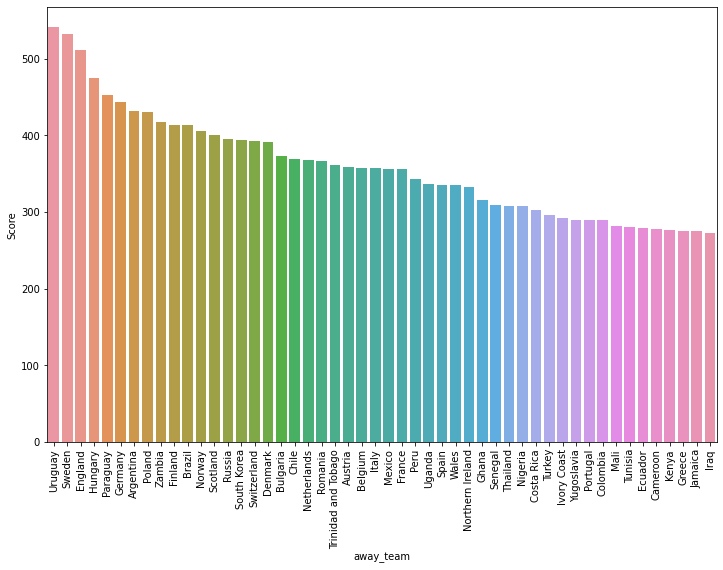

In [7]:
plt.figure(figsize=(12,8))
away_score_team=away_score_team.sort_values(by='Score',ascending=False)
sns.barplot(x=away_score_team.away_team[:50],y=away_score_team.Score[:50])
plt.xticks(rotation=90)
plt.show()

In [8]:
df['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [9]:
df['tournament'].value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64

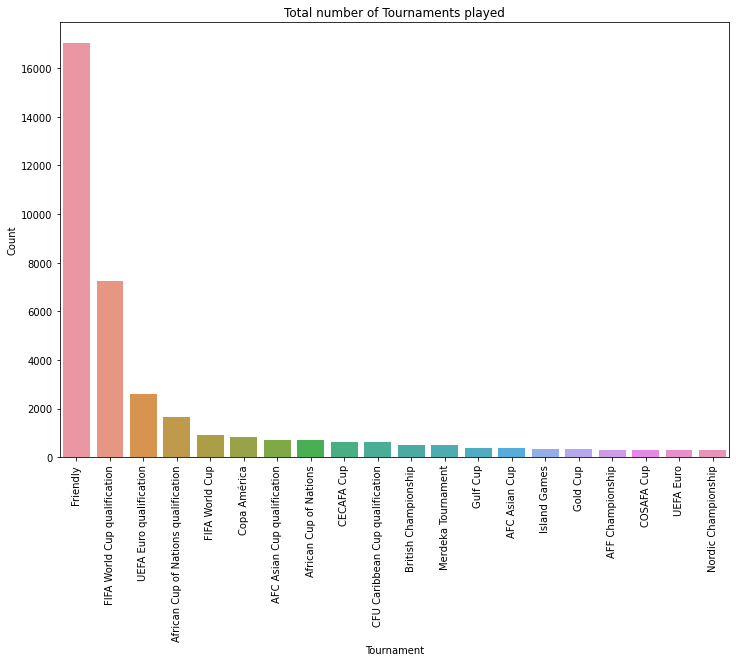

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['tournament'].value_counts().index[:20],y=df['tournament'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Tournament")
plt.title("Total number of Tournaments played")
plt.show()

In [11]:
tournament=df['tournament'].value_counts()
names=tournament.index
values=tournament.values

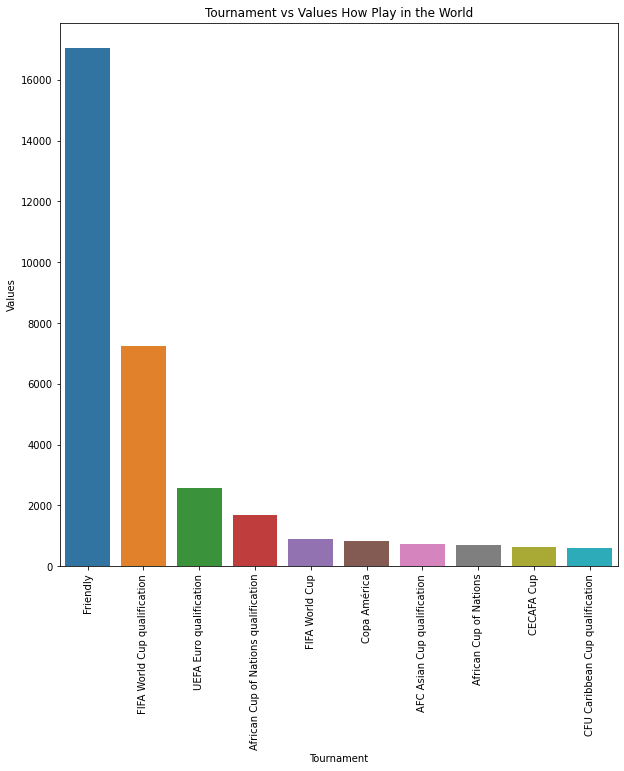

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x=names[:10],y=values[:10])
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Tournament')
plt.title('Tournament vs Values How Play in the World')
plt.show()

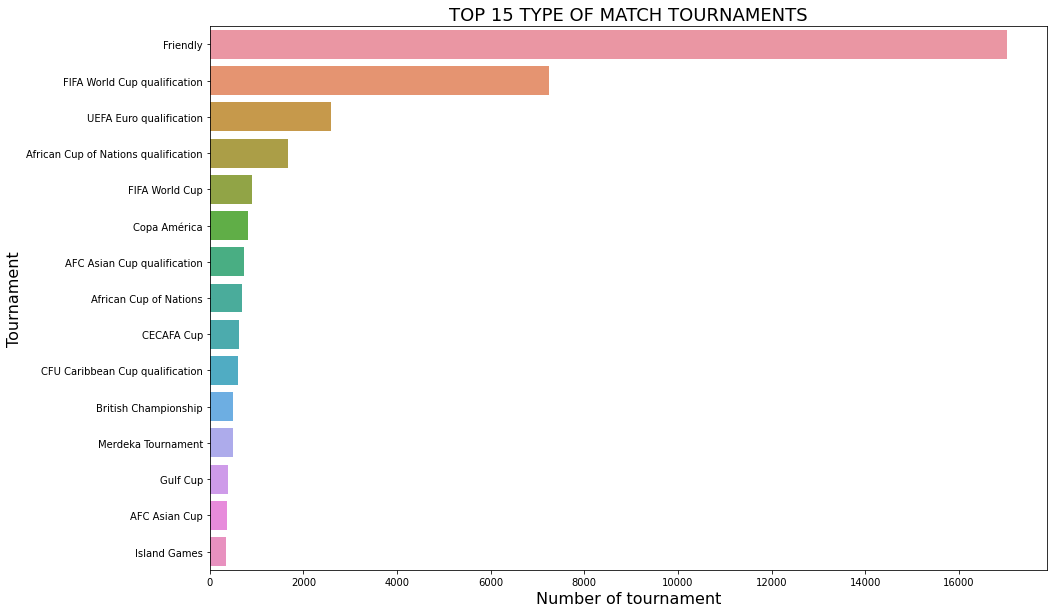

In [13]:
matches = df.astype({'date':'datetime64[ns]'})
tournament = matches['tournament'].value_counts()
tournament = tournament[:15]

plt.figure(figsize = (15,10))
ax = sns.barplot(y=tournament.index, x=tournament.values, orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 15 TYPE OF MATCH TOURNAMENTS", fontsize=18)
plt.show()

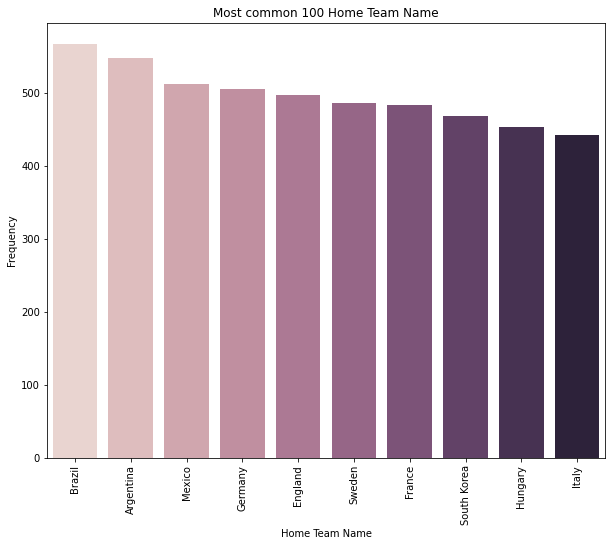

In [14]:
home_name_index=df.home_team.value_counts()
home_name_index=home_name_index.head(10)

plt.figure(figsize=(10,8))
ax=sns.barplot(x=home_name_index.index,y=home_name_index.values,palette=sns.cubehelix_palette(len(home_name_index.index)))
plt.xlabel('Home Team Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Most common 100 Home Team Name')
plt.show()

In [15]:
veri=df[df['tournament']=='FIFA World Cup'].tail(56)

len(veri['home_team'].unique())
allteam=veri['home_team'].unique()
allteam

array(['Costa Rica', 'Germany', 'Brazil', 'Sweden', 'Belgium', 'Tunisia',
       'Colombia', 'Poland', 'Russia', 'Portugal', 'Uruguay', 'Iran',
       'Denmark', 'France', 'Argentina', 'Nigeria', 'Serbia',
       'South Korea', 'England', 'Japan', 'Saudi Arabia', 'Spain',
       'Australia', 'Iceland', 'Mexico', 'Switzerland', 'Senegal',
       'Panama', 'Croatia'], dtype=object)

In [16]:
away_scores_allteam=[]
home_scores_allteam=[]
for team in allteam:
    toplam=sum(veri[veri['home_team']==team].away_score)
    away_scores_allteam.append(toplam)
    home_scores_allteam.append(sum(veri[veri['home_team']==team].home_score))
    toplam=0

In [17]:
all_team=pd.DataFrame([allteam,home_scores_allteam,away_scores_allteam]) 

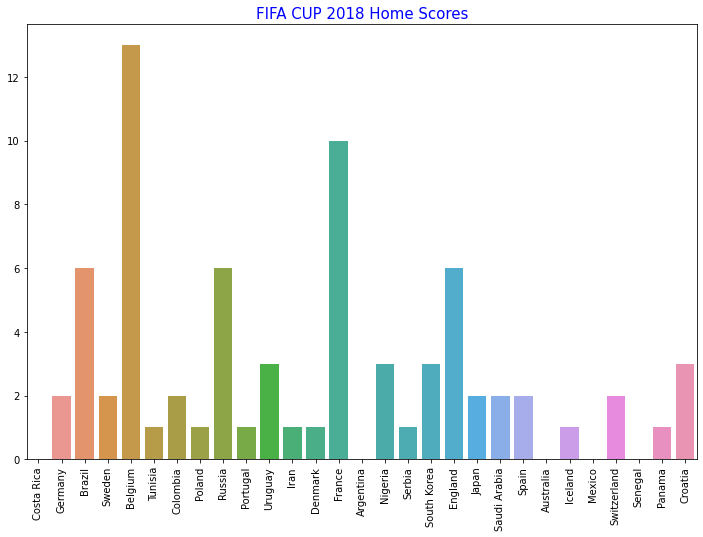

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x=allteam,y=home_scores_allteam)
plt.title('FIFA CUP 2018 Home Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

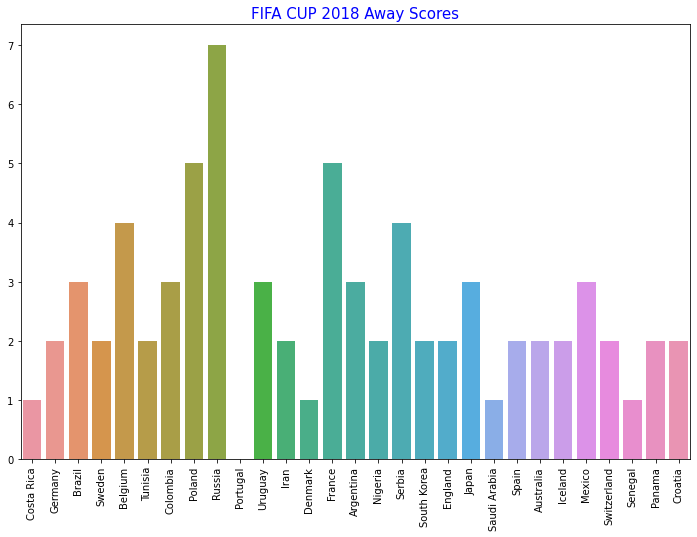

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=allteam,y=away_scores_allteam)
plt.title('FIFA CUP 2018 Away Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


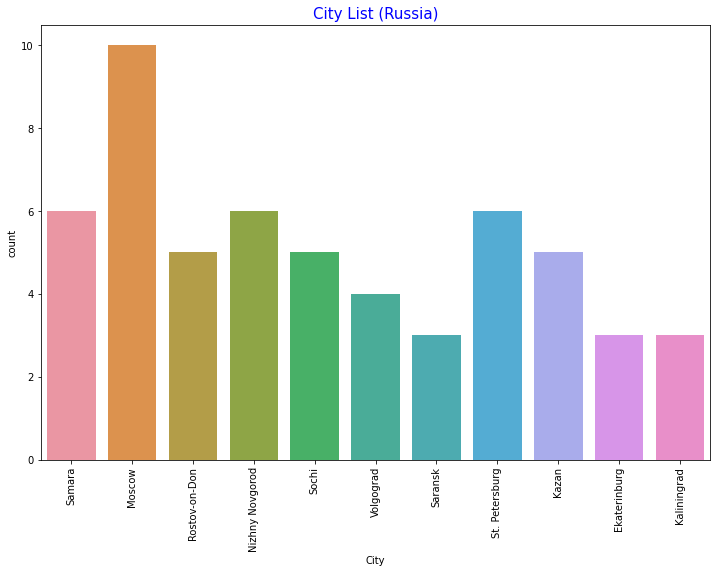

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(veri.city)
plt.xlabel('City')
plt.xticks(rotation=90)
plt.title('City List (Russia)',color='blue',fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


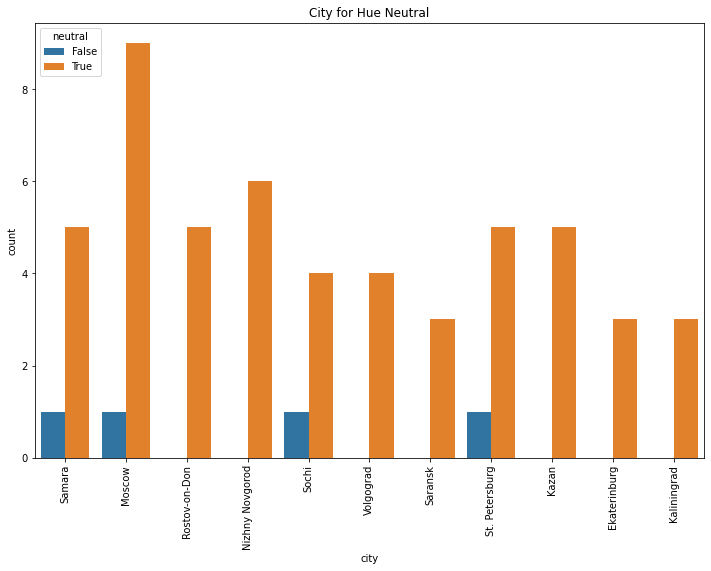

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(veri.city,hue=veri.neutral)
plt.xticks(rotation=90)
plt.title('City for Hue Neutral')
plt.show()